In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo
df = pd.read_csv("datos_Solucion.csv", sep=',')

# Eliminar columnas sin nombre
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Renombrar columnas para evitar errores por espacios
df.columns = df.columns.str.strip()

# Eliminar filas vacías o totales
df = df.dropna(subset=["Nombre", "Departamento", "Salario"])
df = df[~df["Nombre"].str.contains("Total", na=False)]

# Limpiar y convertir el salario
# Convertir todo a string antes de limpiar
df["Salario"] = df["Salario"].astype(str)

# Limpiar símbolos y convertir a float
df["Salario"] = (
    df["Salario"]
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)


# Agrupar por departamento y sumar los salarios
salario_por_departamento = df.groupby("Departamento")["Salario"].sum().sort_values(ascending=False)


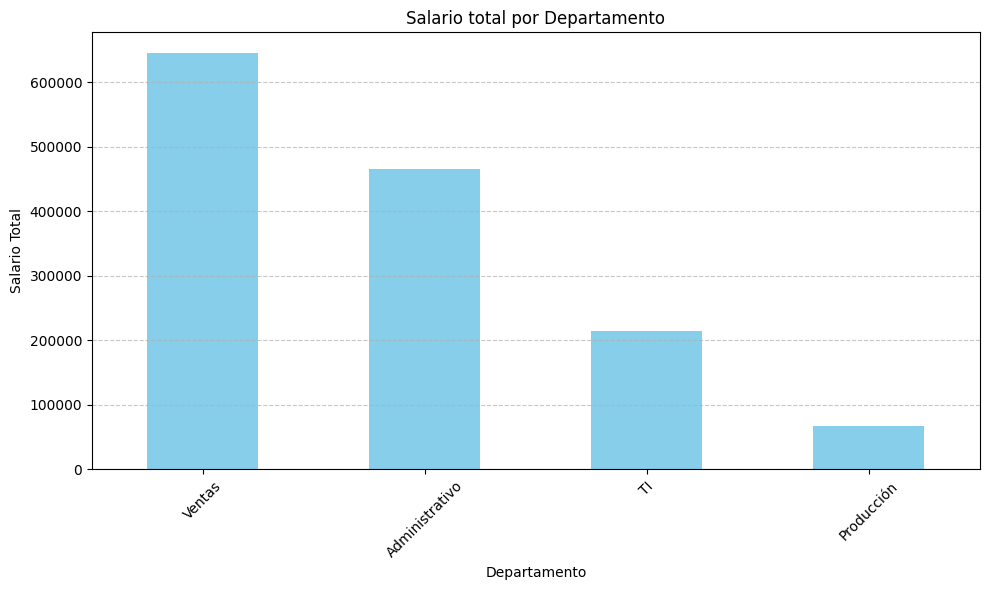

In [6]:
plt.figure(figsize=(10,6))
salario_por_departamento.plot(kind='bar', color='skyblue')
plt.title("Salario total por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Salario Total")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


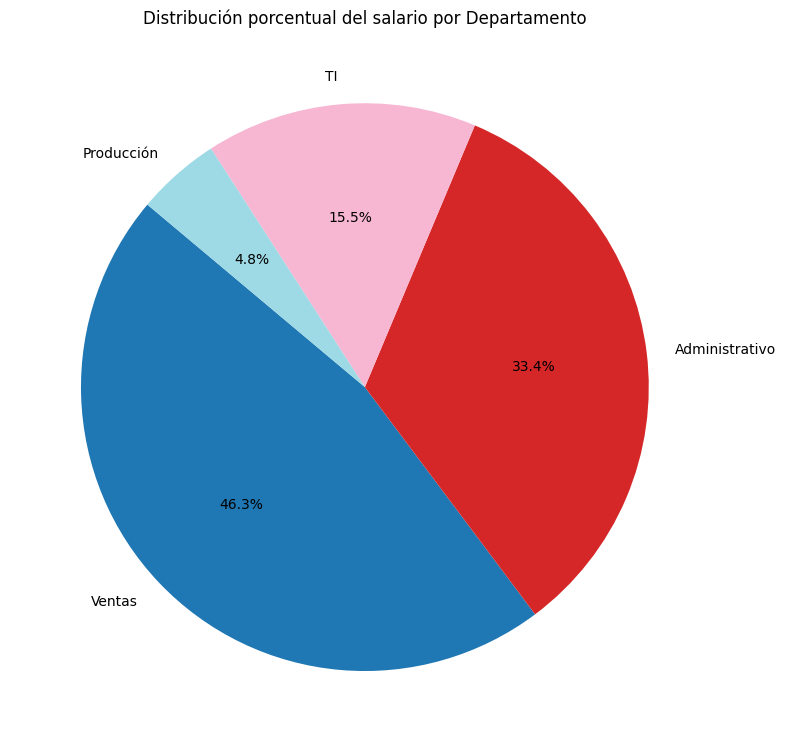

In [7]:
plt.figure(figsize=(8,8))
salario_por_departamento.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title("Distribución porcentual del salario por Departamento")
plt.ylabel("")
plt.tight_layout()
plt.show()
